In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings as warn
warn.filterwarnings('ignore')

In [9]:
#Load data
df = pd.read_csv('Data/RestaurantVisitors.csv', index_col='date', parse_dates=True)
df.index.freq = 'D'
df.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [11]:
df1 = df.dropna()
df1.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0
2017-04-21,Friday,0,na,38.0,53.0,36.0,38.0,165.0
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0


In [13]:
# Change the data type to integers
df1.columns
cols = ['rest1', 'rest2', 'rest3',
       'rest4', 'total']

In [14]:
for column in cols:
    df1[column] = df1[column].astype(int)

In [17]:
df1.dtypes

weekday         object
holiday          int64
holiday_name    object
rest1            int32
rest2            int32
rest3            int32
rest4            int32
total            int32
dtype: object

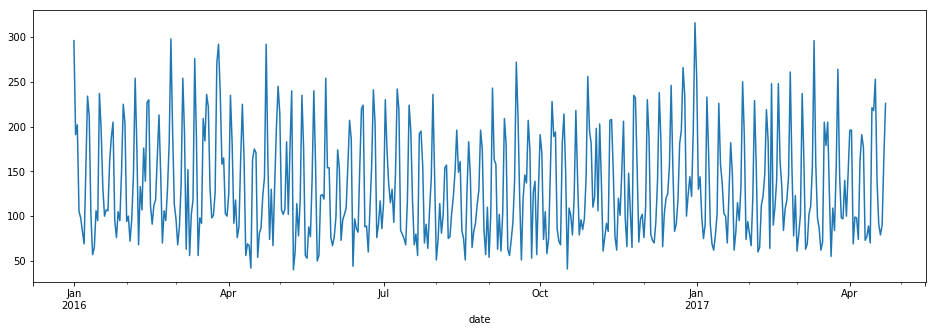

In [18]:
df1['total'].plot(figsize=(16,5))

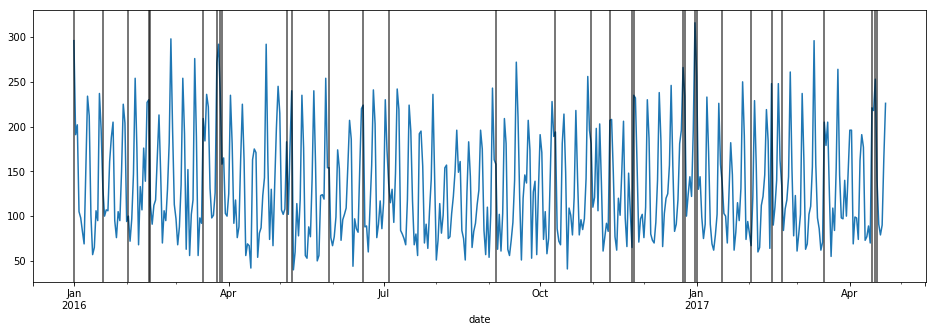

In [22]:
ax = df1['total'].plot(figsize=(16,5))
for day in df1.query('holiday==1').index:
    ax.axvline(x=day, color="black", alpha=0.7)

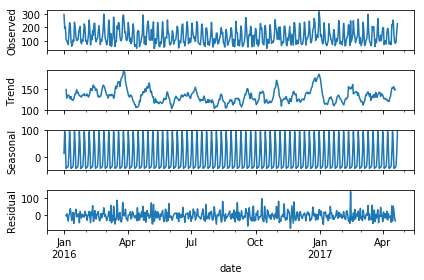

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df1['total'])
result.plot();

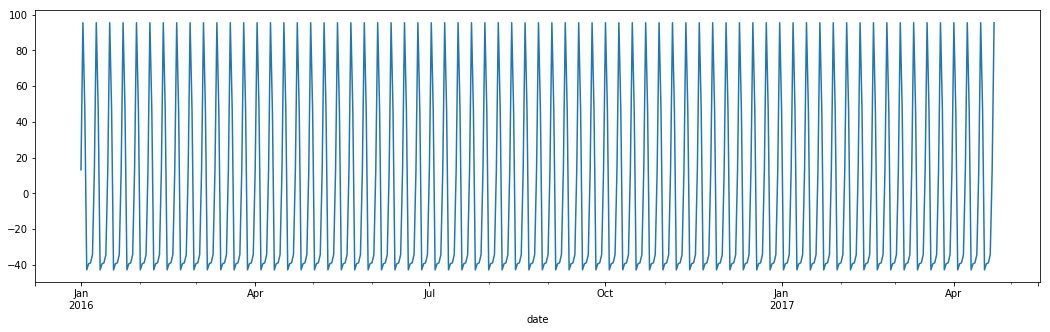

In [24]:
result.seasonal.plot(figsize=(18,5))

In [25]:
len(df1)

478

In [27]:
train = df1.iloc[:436]
test = df1.iloc[436:]

In [28]:
from pmdarima import auto_arima

In [32]:
auto_arima(df1['total'], seasonal=True, m=7).summary()

C:\ProgramData\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(1, 0, 0) seasonal_order=(2, 0, 1, 7); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\ProgramData\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\tsa

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  478
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2417.721
Date:                           Wed, 12 May 2021   AIC                           4845.442
Time:                                   16:16:31   BIC                           4866.290
Sample:                                        0   HQIC                          4853.638
                                           - 478                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     20.5672      4.363      4.714      0.000      12.016      29.118
ar.L1          0.1897      0.045      4.221      0.000       0.102       0.278
ar.S.L7        0.4258      0.037     11.606      0.000       0.354       0.498
ar.S.L14       0.3873      0.036     10.734      0.000       0.317       0.458
sigma2      1427.4035     86.679     16.468      0.000    1257.515    1597.292
===================================================================================
Ljung-Box (Q):                       77.20   Jarque-Bera (JB):                27.47
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                             0.47
Prob(H) (two-sided):                  0.18   Kurtosis:                         3.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [35]:
model = SARIMAX(train['total'], order=(1,0,0), seasonal_order=(2,0,0,7),
                enforce_invertibility=False)

In [36]:
results = model.fit()

In [37]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2224.701
Date:                           Wed, 12 May 2021   AIC                           4457.403
Time:                                   16:29:18   BIC                           4473.713
Sample:                               01-01-2016   HQIC                          4463.840
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2212      0.047      4.711      0.000       0.129       0.313
ar.S.L7        0.5063      0.036     14.187      0.000       0.436       0.576
ar.S.L14       0.4574      0.037     12.379      0.000       0.385       0.530
sigma2      1520.2899     82.277     18.478      0.000    1359.029    1681.550
===================================================================================
Ljung-Box (Q):                       83.96   Jarque-Bera (JB):                29.23
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.34
Prob(H) (two-sided):                  0.37   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
start = len(train)
end = len(train) + len(test) -1

In [39]:
predictions = results.predict(start, end).rename('SARIMA Model')

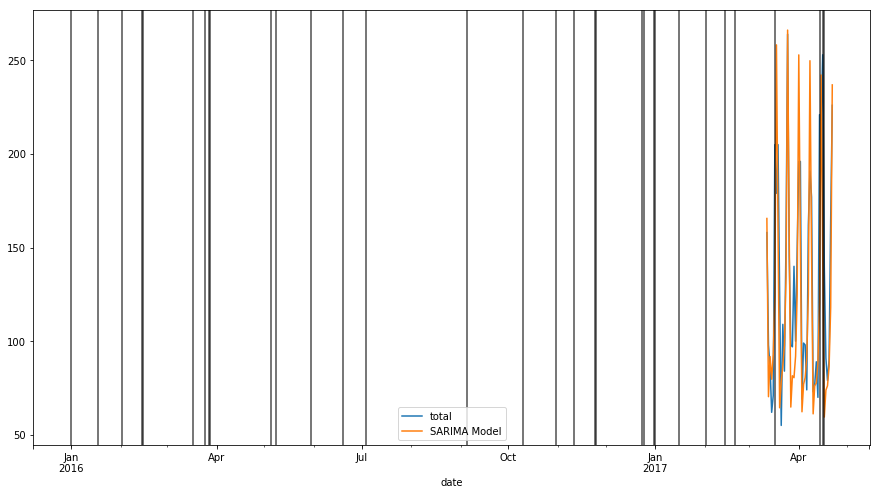

In [43]:
ax = test['total'].plot(legend=True, figsize=(15,8))
predictions.plot(legend=True)


In [44]:
from statsmodels.tools.eval_measures import rmse
rmse(test['total'], predictions)

41.26315490346024

In [46]:
# EXOGENOUS VARIABLE

#df1[['holiday']]
auto_arima(df1['total'], exogenous=df1[['holiday']], seasonal=True, m=7).summary()

C:\ProgramData\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unab

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  478
Model:             SARIMAX(0, 0, 1)x(2, 0, 0, 7)   Log Likelihood               -2348.657
Date:                           Wed, 12 May 2021   AIC                           4709.315
Time:                                   16:44:54   BIC                           4734.332
Sample:                                        0   HQIC                          4719.150
                                           - 478                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     11.5576      4.274      2.704      0.007       3.181      19.934
x1            74.8360      4.545     16.464      0.000      65.927      83.745
ma.L1          0.1781      0.051      3.474      0.001       0.078       0.279
ar.S.L7        0.5059      0.045     11.232      0.000       0.418       0.594
ar.S.L14       0.3843      0.043      8.982      0.000       0.300       0.468
sigma2      1142.0258     80.193     14.241      0.000     984.851    1299.201
===================================================================================
Ljung-Box (Q):                       85.07   Jarque-Bera (JB):                 1.78
Prob(Q):                              0.00   Prob(JB):                         0.41
Heteroskedasticity (H):               0.89   Skew:                             0.12
Prob(H) (two-sided):                  0.45   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Train our SARIMAX

In [47]:
model = SARIMAX(train['total'], exog=train[['holiday']], )order=(1,0,1), 
               seasonal_order=(1,0,1,7), enforce_invertibility=False

In [48]:
result = model.fit()
result.summary()

C:\ProgramData\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 7)   Log Likelihood               -2096.196
Date:                           Wed, 12 May 2021   AIC                           4204.393
Time:                                   16:49:12   BIC                           4228.859
Sample:                               01-01-2016   HQIC                          4214.048
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       68.5912      3.856     17.790      0.000      61.034      76.148
ar.L1          0.9999      0.000   6714.123      0.000       1.000       1.000
ma.L1         -1.0622      0.019    -55.671      0.000      -1.100      -1.025
ar.S.L7        0.9999      0.000   4386.281      0.000       0.999       1.000
ma.S.L7       -0.9706      0.028    -34.742      0.000      -1.025      -0.916
sigma2       712.0280     51.125     13.927      0.000     611.826     812.230
===================================================================================
Ljung-Box (Q):                       46.58   Jarque-Bera (JB):                16.06
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                             0.19
Prob(H) (two-sided):                  0.85   Kurtosis:                         3.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
start = len(train)
end = len(train) + len(test) - 1
predictions = result.predict(start, end, exog=test[['holiday']]).rename('SARIMAX with Exog')

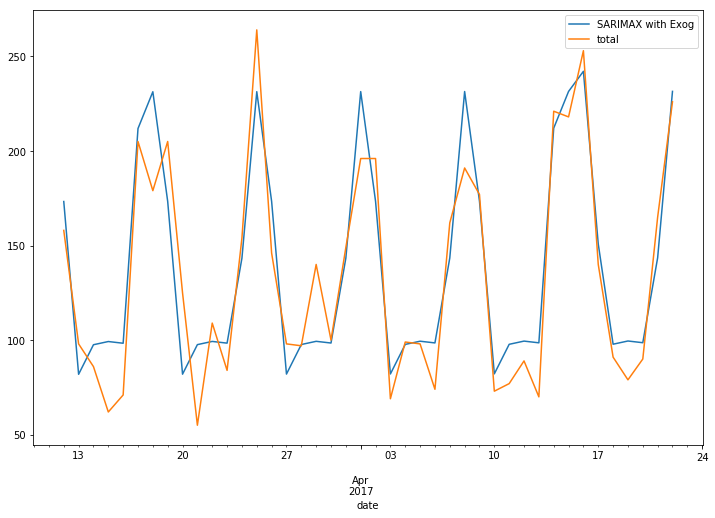

In [51]:
predictions.plot(figsize=(12,8), legend=True)
test['total'].plot(legend=True)

In [52]:
rmse(test['total'], predictions)

22.827868354705647

In [54]:
############ FORECASTING MOTHERFUCKER ##########################
model = SARIMAX(df1['total'], exog=df1[['holiday']],
               order=(1,0,1), 
               seasonal_order=(1,0,1,7), enforce_invertibility=False)

In [55]:
results = model.fit()

In [58]:
exog_forecast = df[478:][['holiday']]
exog_forecast #Need to know future holiday schedule

,holiday
date,
2017-04-23,0
2017-04-24,0
2017-04-25,0
2017-04-26,0
2017-04-27,0
2017-04-28,0
2017-04-29,0
2017-04-30,0
2017-05-01,0


In [59]:
fcast = results.predict(len(df1), len(df1)+38, exog=exog_forecast).rename('Final SARIMAX Forecast')

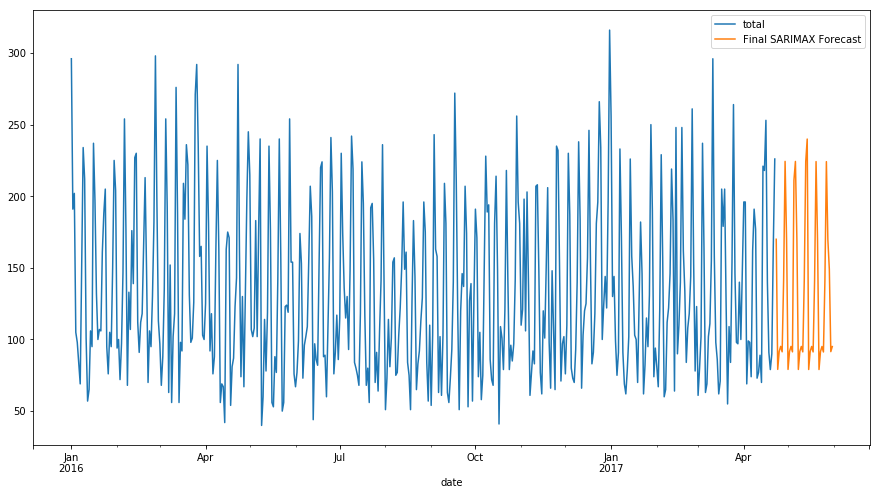

In [61]:
df1['total'].plot(figsize=(15,8), legend=True)
fcast.plot(legend=True)